### 예제
1. csv폴더 안 test_csv 폴더에서 '오프라인.csv' 파일을 로드 
2. 컬럼의 이름을 변경 -> ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
3. 결측치가 존재하는가? 확인
4. 기준년월 데이터를 시계열 데이터로 변경 
5. 성별을 기준으로 연도별 건당 이용금액의 평균이 어떻게 되는가?
    - 기준년 데이터가 존재하지 않기때문에 기준년 컬럼을 생성 -> 기준년월 데이터에서 추출 
    - 건당이용금액 데이터는 총이용금액 / 총이용건수를 계산하여 대입 
    - 기준년 데이터를 이용하여 데이터를 그룹화/재구조화를 하고 건당이용금액의 평균을 구한다.

In [ ]:
import pandas as pd

In [ ]:
# 데이터 로드 
offline = pd.read_csv("../../csv/test_csv/오프라인.csv", encoding='cp949')

In [ ]:
offline.head()

In [ ]:
# 컬럼의 이름을 변경 
# case1 rename() 함수
offline.rename(
    columns={
        'crym' : '기준년월'
    }
)

In [ ]:
# DataFrame 안에 columns 변수의 데이터를 변경 
offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [ ]:
offline.head()

In [ ]:
# 결측치를 확인하는 방법 
# 데이터프레임의 정보 출력 
offline.info()

In [ ]:
# isna() : 결측치의 유무를 판단하는 함수 
# sum() : 합계를 구하는 함수 (True는 1, False 0)
offline.isna().sum()

In [ ]:
# 성별 컬럼의 데이터중 '-'는 결측치라고 항목 정의서에 명시 
# '-' 데이터의 개수를 확인 
# 1 : 남자, 2 : 여자, 9 : 남녀무관, - : 결측치
# isin() 함수 이용
offline['성별'].isin(['-']).sum()

In [ ]:
offline['성별'].value_counts()

In [ ]:
from datetime import datetime

In [ ]:
# 기준년월 데이터를 시계열 데이터를 변경
# datetime 라이브러리 사용
offline['기준년월']
datetime.strptime( str(offline['기준년월'][0]), '%Y%m' )
# python에서 제공하는 기본 map( 함수, 1차원 데이터 ) -> map 타입

# series에서 제공하는 Series.map( 함수 ) -> Series 타입입
offline['기준년월'].map(
    lambda x : datetime.strptime(str(x), '%Y%m')
)


In [ ]:

# pandas에서 제공하는 to_datetime()
offline['기준년월'] =  pd.to_datetime(offline['기준년월'], format ='%Y%m')

In [ ]:
# 기준년 컬럼을 생성하여 기준년월에서 년도만 추출
# datetime라이브러리 사용
# map()
offline['기준년월'].map(
    lambda x : x.strftime('%Y')
)


In [ ]:
# Series dt 사용
offline['기준년월'].dt.strftime('%Y')

In [ ]:
offline['기준년'] = offline['기준년월'].dt.year

In [ ]:
# 건당이용금액 = 총이용금액(series) / 총이용건수(series)
offline['건당이용금액'] = offline['총이용금액'] / offline['총이용건수']


In [ ]:
# groupby()를 이용한 그룹화 연산 
# 성별, 년도별 데이터를 이용하여 그룹화를하고 건당이용금액의 평균 
group_data = \
    offline[ [ '성별', '기준년', '건당이용금액' ] ].groupby(['성별', '기준년']).mean()

In [ ]:
# unstack() -> 인덱스의 기준을 컬럼의 기준으로 변경
# stack() -> 컬럼의 기준을 인덱스의 기준으로 변경
group_data.unstack()

In [ ]:
# pivot_table() 
# 성별, 년도별 총이용금액의 합계를 확인 
offline.pivot_table(
    index = '성별',
    columns= '기준년', 
    values= '총이용금액', 
    aggfunc= 'sum'
)

In [ ]:
import matplotlib.pyplot as plt
import platform

In [ ]:
# 그래프 시각화 한글 깨짐 방지 -> 폰트 변경 
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [ ]:
# 기준년월,업종 별 총이용금액 합계 -> 그래프 시각화(라인그래프)
group_data2 = offline.groupby(['기준년월', '업종'])['총이용금액'].sum()
group_data2.unstack().plot()

1.  온라인.csv 파일을 로드 
2. 두개의 데이터프레임을 단순한 행 결합 (유니언 결합)
    - 오프라인 데이터와 온라인 데이터의 컬럼의 이름이 다른 문제 
        - 온라인 데이터의 컬럼의 이름을 변경 
    - 오프라인 데이터에서 기준년월 컬럼은 지금 시계열, 온라인의 기준년월 숫자
        - 온라인의 기준년월을 시계열로 변경
    - 오프라인 데이터에서 기준년, 건당이용금액 제거 
    - 온라인 데이터에서 결측치가 존재하는가?
    - 단순 행 결합 
3. 온라인 데이터에서는 업종 컬럼이 존재하지 않기때문에 결측치 생성
    - 결측치를 '온라인' 대체

In [ ]:
online = pd.read_csv("../../csv/test_csv/온라인.csv")

In [ ]:
online.head()

In [ ]:
online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']

In [ ]:
online.head()

In [ ]:
offline.head(1)

In [ ]:
online['기준년월'] = pd.to_datetime(online['기준년월'], format='%Y%m')

In [ ]:
# 특정 컬럼을 제거 
# 특정 컬럼만 선택해서 필터 
offline.loc[:,'기준년월' : '총이용금액']

In [ ]:
offline.drop(['기준년', '건당이용금액'], axis=1, inplace=True)

In [ ]:
# 온라인 데이터에서 결측치가 존재하는가?
online.isna().sum()

In [ ]:
online.isin(['-']).sum()

In [82]:
df = pd.concat([offline, online], axis=0)

In [ ]:
# df에서 업종에 존재하는 결측치는 '온라인' 대체
df['업종'].fillna('온라인')

In [ ]:
# if문 한줄 -> '참인경우결과' if 조건식 else '거짓인경우결과'
df['업종'].map(
    lambda x : '온라인' if pd.isna(x) else x
)

In [88]:
flag = df['업종'].isna()
df.loc[flag, '업종'] = '온라인'

In [89]:
df.isna().sum()

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [90]:
df['연령대'].value_counts()

연령대
10    330
20    330
30    330
40    330
50    330
60    330
70    330
80    330
90    330
0     284
1      45
Name: count, dtype: int64

In [94]:
df2 = df.loc[df['연령대'] != 0 ] 

In [96]:
group_data3 = df2.groupby(['기준년월', '업종'])['총이용금액'].sum()

<AxesSubplot: xlabel='기준년월'>

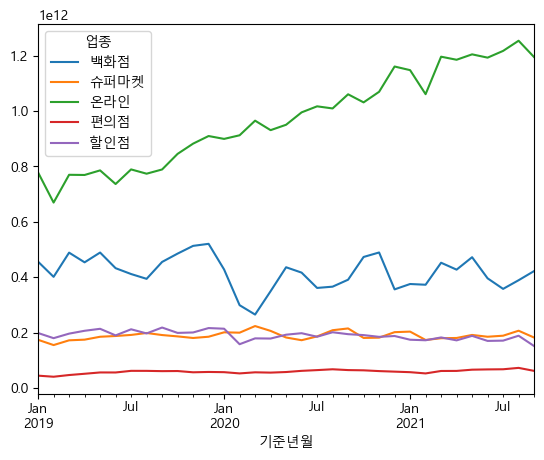

In [98]:
group_data3.unstack().plot()

In [103]:
# df2에서 '업종' 컬럼의 데이터가 온라인이라면 0
# 온라인이 아니면 1
# 새로운 컬럼을 생성
flag = df2['업종'] == '온라인'
df2.loc[flag, '온/오프'] = 0
df2.loc[~flag, '온/오프'] = 1

In [104]:
df2['온/오프'].value_counts()

온/오프
1.0    2415
0.0     600
Name: count, dtype: int64

In [106]:
df2['온/오프'] = df2['온/오프'].map(
    {
        0 : '온라인', 
        1 : '오프라인'
    }
)

C:\Users\moons\AppData\Local\Temp\ipykernel_1912\1179003264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['온/오프'] = df2['온/오프'].map(


In [107]:
df2['온/오프'].value_counts()

온/오프
오프라인    2415
온라인      600
Name: count, dtype: int64

<AxesSubplot: xlabel='기준년월'>

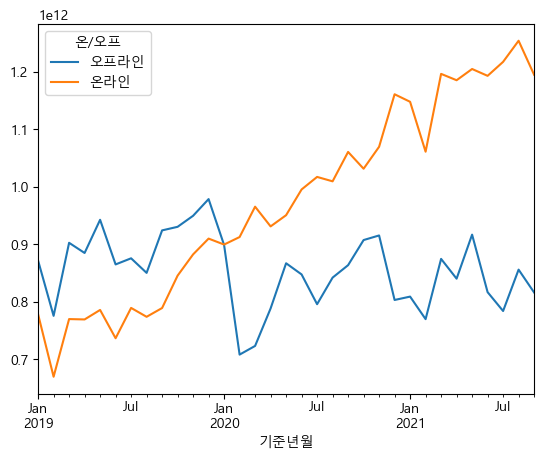

In [109]:
df2.pivot_table(
    index = '기준년월', 
    columns = '온/오프', 
    values= '총이용금액', 
    aggfunc= 'sum'
).plot()

In [114]:
group_data3.unstack().drop('온라인', axis=1).sum(axis=1)

기준년월
2019-01-01    8.717631e+11
2019-02-01    7.755976e+11
2019-03-01    9.027591e+11
2019-04-01    8.850398e+11
2019-05-01    9.427933e+11
2019-06-01    8.651151e+11
2019-07-01    8.757612e+11
2019-08-01    8.503992e+11
2019-09-01    9.243531e+11
2019-10-01    9.305805e+11
2019-11-01    9.497805e+11
2019-12-01    9.788375e+11
2020-01-01    8.988757e+11
2020-02-01    7.081419e+11
2020-03-01    7.232443e+11
2020-04-01    7.884673e+11
2020-05-01    8.671467e+11
2020-06-01    8.476793e+11
2020-07-01    7.958787e+11
2020-08-01    8.421468e+11
2020-09-01    8.638141e+11
2020-10-01    9.075309e+11
2020-11-01    9.155384e+11
2020-12-01    8.032180e+11
2021-01-01    8.091106e+11
2021-02-01    7.698740e+11
2021-03-01    8.747353e+11
2021-04-01    8.403194e+11
2021-05-01    9.169465e+11
2021-06-01    8.168607e+11
2021-07-01    7.840303e+11
2021-08-01    8.560502e+11
2021-09-01    8.163272e+11
dtype: float64